In [1]:
from IFS import propagateIFS
import numpy as np
from params import Params
from astropy.io import fits as pyf
import tools
import time
import logging as log
from tools.image import Image

%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'


Populating the interactive namespace from numpy and matplotlib


In [2]:
par = Params()

In [3]:
tools.initLogger(par.exportDir+'/IFS.log')

In [4]:
log.info('Loading input')

2017-01-12 15:27:33,826: INFO     Loading input


In [5]:
BW = 0.18
Nlam = 51
clam = 0.77
wavelist= clam*np.linspace(1.-BW/2.,1.+BW/2.,Nlam)
fname = './Inputs/PSF_SPLC_Nwvl51_BW18pct_star.fits'
hdu = pyf.open(fname)
inputcube = hdu[0].data    
mperpix = 3./5.*par.pitch # 5 pixels per lambda/D
par.pixperlenslet = par.pitch/mperpix
par.mperpix = mperpix


In [6]:
finalFrame = propagateIFS(par,wavelist,inputcube)

2017-01-12 15:27:33,860: INFO     The number of input pixels per lenslet is 1.666667
2017-01-12 15:27:33,861: INFO     The plate scale of the input cube is 104.400000 um/pixel
2017-01-12 15:27:33,862: INFO     Import all kernels and rescale them to same plate scale
2017-01-12 15:27:33,863: INFO     Loading spot diagrams.
2017-01-12 15:27:33,947: INFO     kernel scale average is 1.706 micron per pixel at 890 nm
2017-01-12 15:27:33,949: INFO     Resampling kernels to match input
2017-01-12 15:27:34,301: INFO     pxprlens: 419.000
2017-01-12 15:27:34,302: WARNING  Kernel too small to capture crosstalk
2017-01-12 15:27:34,360: WARNING  Kernel too small to capture crosstalk
2017-01-12 15:27:34,409: WARNING  Kernel too small to capture crosstalk
2017-01-12 15:27:34,454: WARNING  Kernel too small to capture crosstalk
2017-01-12 15:27:34,500: WARNING  Kernel too small to capture crosstalk
2017-01-12 15:27:34,548: WARNING  Kernel too small to capture crosstalk
2017-01-12 15:27:34,594: WARNING  

21.9134661795 -14.310835056
875.759515076 272.623973504


2017-01-12 15:27:40,542: INFO     Writing data to /Users/mrizzo/IFS/IFS-Simulator/SimResults/finalframe_nodistort_n25.fits
2017-01-12 15:27:40,543: INFO     Done.
2017-01-12 15:27:40,544: INFO     Performance: 6 seconds total


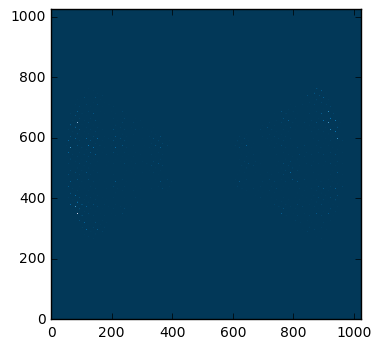

In [7]:
pylab.imshow(finalFrame, cmap='PuBu_r')